# Preprocessing
cleaning, missing values, recoding

In [1]:
# Imports Packs
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# Data import
survey = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")


# ----------- CLEANING THE DATA -----------
# Column rename
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
survey.columns = renamed_columns

# Sex column needs to be recoded (number of unique values = 70)
survey['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

survey['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

survey['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)

# Recode Comp size & country columns (for ease when doing plots)
survey['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

survey['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
survey['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)

survey['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
survey['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)

# Max age is 323, min age is 3.
# There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo.) 
# These people will take the average age of the dataset (the correct calculated one, w/out outliers)
mean_age = survey[(survey['age'] >= 18) | (survey['age'] <= 75)]['age'].mean()
survey['age'].replace(to_replace = survey[(survey['age'] < 18) | (survey['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

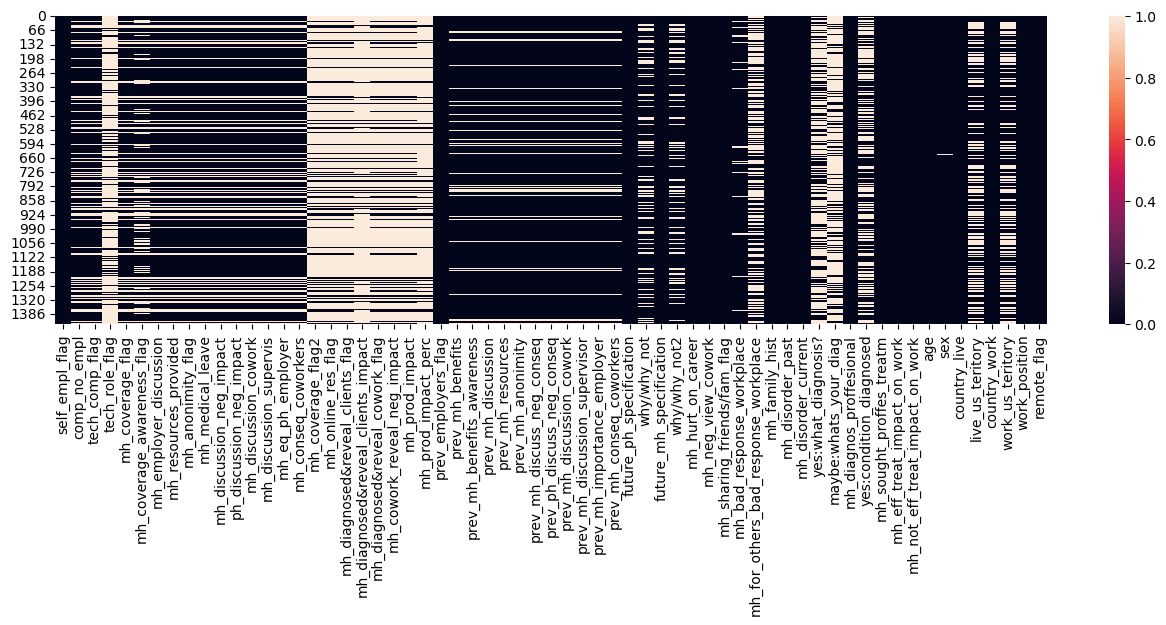

In [2]:
# ----------- MISSING VALUES -----------
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = survey.isna());

In [3]:
# The survey has 1433 rows, so first we will drop all columns where more than half of the observations have missing values
cols = (survey.isna().sum() >= survey.shape[0]/2).tolist()
to_drop = survey.columns[cols]
survey.drop(labels = to_drop, axis = 1, inplace = True)

# Dealing with other missing values
from sklearn.impute import SimpleImputer

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(survey)
imp_data = pd.DataFrame(data = imp.transform(survey), columns = survey.columns)

In [4]:
# ----------- ENCODING -----------
# Split data into 2 datasets: one that needs to be encoded, one that doesn't need to
cols_to_encode = [x for x in imp_data.columns if x not in ['age', 'why/why_not', 'why/why_not2', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position']]

data_to_encode = imp_data[cols_to_encode]
data_not_encode = imp_data[['why/why_not', 'why/why_not2', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position']]

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Encoding function
def encode(data):
    cat_columns = list(data.select_dtypes(include=['category', 'object']).columns)
    
    # Define the ColumnTransformer
    ct = ColumnTransformer(
        transformers=[
            ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_columns)
        ],
        remainder='passthrough'
    )
    
    # Fit and transform the data
    encoded_matrix = ct.fit_transform(data)
    
    return ct, encoded_matrix

# Encode data
ct, encoded_matrix = encode(data_to_encode)

# Creating DataFrame from the encoded matrix
encoded_columns = ct.get_feature_names_out()
encoded_data = pd.DataFrame(encoded_matrix, columns=encoded_columns)

# Concatenating the encoded data with the data_not_encode
prep_data = pd.concat([encoded_data.reset_index(drop=True), data_not_encode.reset_index(drop=True)], axis=1)



In [5]:
# ----------- OTHER CHANGES -----------
# There are 53 total countries
# Out of all, most respondents are in US, UK, Canada, Germany, Netherlands and Australia.
# Usually, for a sample to be representative enough for the population, the size needs to be by convention >30.
# Respondents cannot be treated equaly within a response (different background, culture etc.), so we will exclude all nations
        #with a sample size smaller than 30. Because countries with no. responses > 30 are
        #  quite similar (well developed countries
        #with big economies and similar living standards), some of the analytics will incorporate all countries as one.

# Keep only countries with no. responses > 30.
imp_data = imp_data[imp_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
imp_data = imp_data[imp_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

prep_data = prep_data[prep_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
prep_data = prep_data[prep_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

# Unfortunatelly, the tech flag that identified if the respondent works/ doesn't work in tech had a lot of missing values
# So, we will need to map the 'work_position' column (that didn't have any missing values initially)
# Create the list with tech work positions
tech_list = []
tech_list.append(imp_data[imp_data['work_position'].str.contains('Back-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Front-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Dev')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('DevOps')]['work_position'].tolist())

# Reshape the list (that is a list of lists) and remove duplicates
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# Create a new column and recode it
imp_data['tech_flag'] = imp_data['work_position']
imp_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
remain_list = imp_data['tech_flag'].unique()[1:].tolist()

imp_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

# The same for prep_data
# Create a new column and recode it
prep_data['tech_flag'] = prep_data['work_position']
prep_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
prep_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

# Visualisations

In [6]:
import matplotlib as mpl

sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec


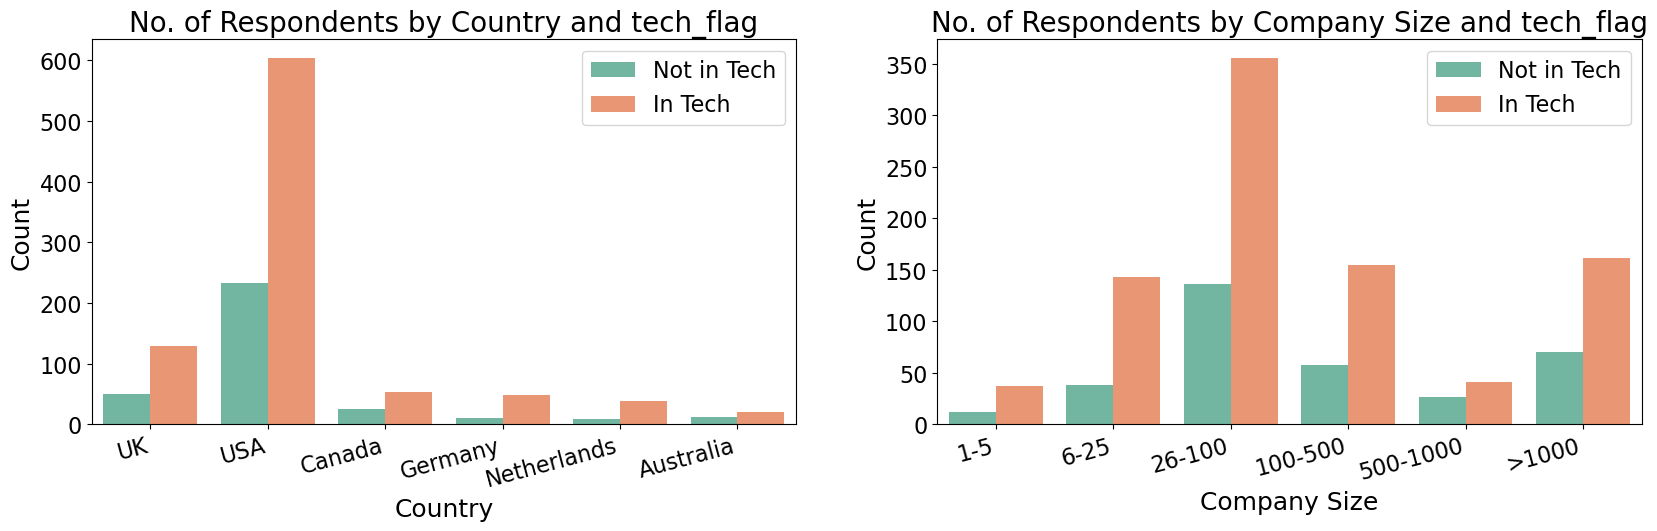

<Figure size 1600x400 with 0 Axes>

In [7]:
# Most respondents are tech and also most of them are in US.
# Most techs are in medium and large companies
# For future analysis, we will exclude all people non-tech - as this analysis focuses on mental health in tech

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country
sns.countplot(x = imp_data['country_live'], hue = imp_data['tech_flag'], ax=ax1)
ax1.set_title('No. of Respondents by Country and tech_flag', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = imp_data['comp_no_empl'], hue = imp_data['tech_flag'], ax=ax2, 
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'])
ax2.set_title('No. of Respondents by Company Size and tech_flag', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);

In [8]:
imp_data[imp_data['tech_flag'] == 1]['age'].describe()

count     894.0
unique     48.0
top        30.0
freq       62.0
Name: age, dtype: float64

<Figure size 1600x500 with 0 Axes>

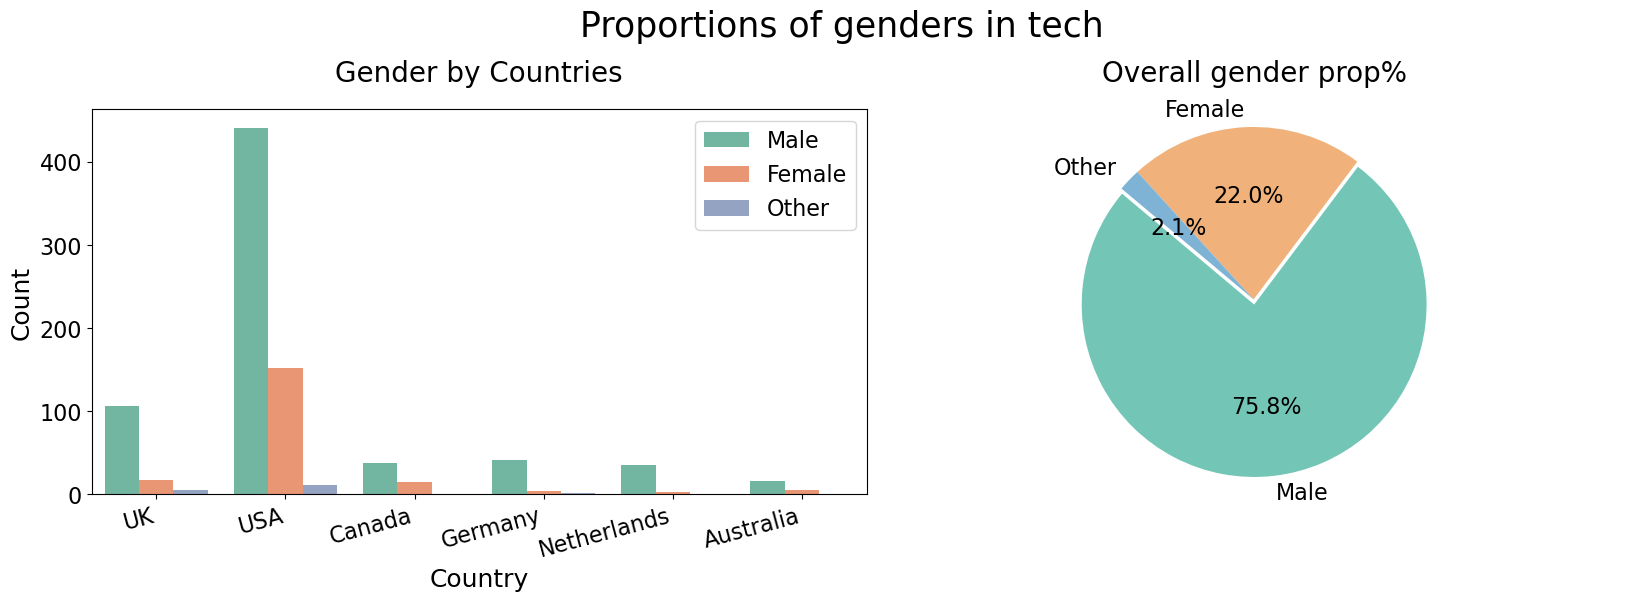

In [9]:
# Most respondents are male

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportions of genders in tech', fontsize = 25, y=1.08)

# Pie Chart
all_techs = imp_data[imp_data['tech_flag'] == 1]['sex'].count()
males = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 1.0)]['sex'].count()
females = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 2.0)]['sex'].count()
other = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['sex'] == 3.0)]['sex'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

# Barchart
sns.countplot(x = imp_data[imp_data['tech_flag'] == 1]['country_live'], hue = imp_data['sex'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Male', 'Female', 'Other']);


<Figure size 1600x500 with 0 Axes>

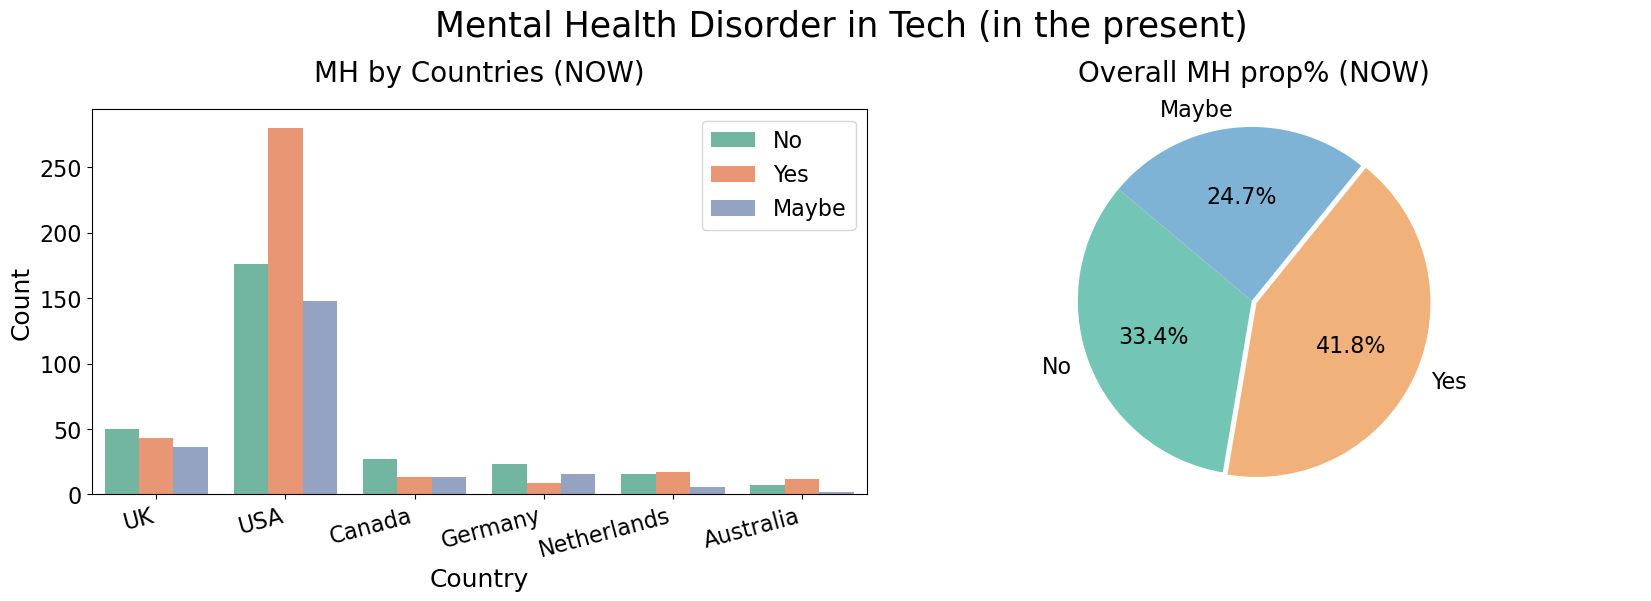

In [10]:
# ----------- NOW -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the present)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = imp_data[imp_data['tech_flag'] == 1]['mh_disorder_current'].count()
no_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'No')]['mh_disorder_current'].count()
yes_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'Yes')]['mh_disorder_current'].count()
maybe_now = imp_data[(imp_data['tech_flag'] == 1) & (imp_data['mh_disorder_current'] == 'Maybe')]['mh_disorder_current'].count()

labels = 'No', 'Yes', 'Maybe'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
sns.countplot(x = imp_data[imp_data['tech_flag'] == 1]['country_live'], hue = imp_data['mh_disorder_current'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend();

# Machine Learning

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing

In [ ]:
# Excluding non numeric columns from dataset
model_data = prep_data.copy()
col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64', 'float64']]
model_data = model_data[col_numeric]

# Model data is our new dataset for predicting variable 'mh_disorder_current'

# Feature variables and target variable
y = model_data['mh_disorder_current']

cols = [col for col in model_data.columns if col not in ['mh_disorder_current']]
X = model_data[cols]

# Data Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Predefined function
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')
# Naive Bayes
nb = GaussianNB()
model_assess(nb, name='Naive Bayes')

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, name='SGD')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, 'SVM')

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, 'Logistic Regression')

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Cross Gradient Booster (Random Forest) <=================== BEST
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, 'XGBoost RF')